##### %matplotlib inline

import numpy as np
import geopandas as gpd
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
pylab.rcParams['figure.figsize'] =10, 8


## Import Shapefiles

In this case I looked for a couple of types of data: vector polygons based on county lines and point data. In this demo we are going to explore doing spatial and attribute joins and then do some data exploration once they are all combined.

http://geodata.vermont.gov/datasets/VTANR::public-water-sources?geometry=-77.941%2C43.059%2C-67.477%2C44.448
            
http://geodata.vermont.gov/datasets/VTANR::water-quality-monitoring-sites?geometry=-75.374%2C43.89%2C-70.142%2C44.579


In [2]:
census = gpd.read_file('/VT_2000_Census_County_Boundaries_and_Statistics.shp', vfs='zip://VT_2000_Census_County_Boundaries_and_Statistics.zip')
waterqlt = gpd.read_file('/Water_Quality_Monitoring_Sites.shp', vfs='zip://Water_Quality_Monitoring_Sites.zip')
forest = gpd.read_file('/VT_County_Forest_Data_19661997.shp', vfs='zip://VT_County_Forest_Data_19661997.zip')

## CRS and Datums
First check that the shapefiles are using the same projections, otherwise spatial merges can go quite wrong

In [3]:
print(census.crs)
print(waterqlt.crs)


{'proj': 'tmerc', 'lat_0': 42.5, 'lon_0': -72.5, 'k': 0.999964286, 'x_0': 500000, 'y_0': 0, 'datum': 'NAD83', 'units': 'm', 'no_defs': True}
{'proj': 'tmerc', 'lat_0': 42.5, 'lon_0': -72.5, 'k': 0.999964286, 'x_0': 500000, 'y_0': 0, 'datum': 'NAD83', 'units': 'm', 'no_defs': True}


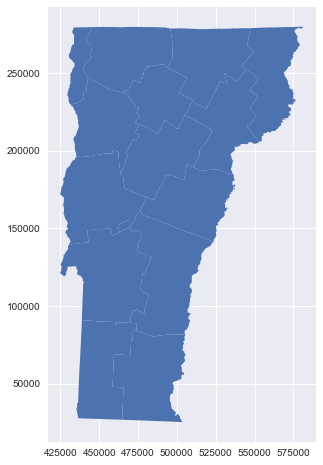

In [4]:
census.plot()

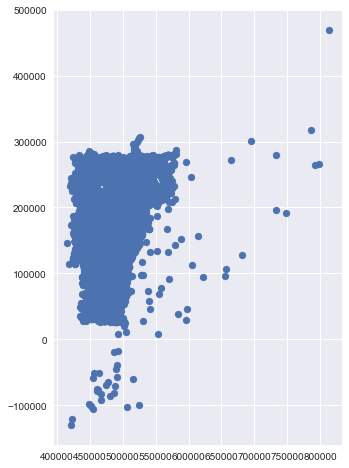

In [5]:
waterqlt.plot()

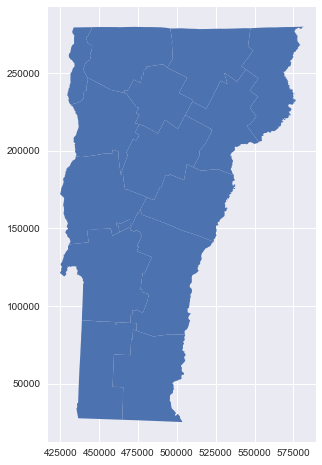

In [6]:
forest.plot()

In [7]:
# another way to check if they are using the same
census.crs == waterqlt.crs

True

In [8]:
census.crs == forest.crs

True

In [9]:
census.head()

,OBJECTID,FIPSSTCO,STATE,COUNTY,OID_,STFID,POP2000,WHITE,BLACK,AMERI_ES,...,AVE_FAM_SZ,HSE_UNITS,URBAN,RURAL,VACANT,OWNER_OCC,RENTER_OCC,SHAPESTAre,SHAPESTLen,geometry
0,1,50001,Vermont,Addison,0,50001,35974,34844,196,93,...,3.02,15312,0,0,2244,9782,3286,2.093455e+09,224144.316819,"POLYGON ((471110.1172867668 152350.9054984394,..."
1,2,50003,Vermont,Bennington,1,50003,36994,36161,155,74,...,2.91,19403,0,0,4557,10599,4247,1.755100e+09,215455.471387,"POLYGON ((436337.1072635216 37330.0554193073, ..."
2,3,50005,Vermont,Caledonia,2,50005,29702,28954,87,163,...,2.95,14504,0,0,2841,8499,3164,1.702881e+09,254119.336311,(POLYGON ((516165.9173180934 187054.0355226113...
3,4,50007,Vermont,Chittenden,3,50007,146571,139446,1328,403,...,3.02,58864,0,0,2412,37292,19160,1.604814e+09,202393.239094,"POLYGON ((453514.1172740302 241227.2455603733,..."
4,5,50009,Vermont,Essex,4,50009,6459,6237,11,41,...,2.92,4762,0,0,2160,2069,533,1.744999e+09,266955.505549,"POLYGON ((574943.5073595017 233740.7855550044,..."


In [10]:
waterqlt.head()

,LocationID,Name,Latitude,Longitude,Descriptio,WBID,BioSiteID,RM,LakeID,BugAssessm,FishAssess,WQData,HabitatDat,ReportURL,geometry
0,502000,Mill Brook,44.45639,-73.01194,Located upstream of bridge on Tarbox Rd.,VT08-04,491300000006,0.6,None,0,0,Yes,Yes,https://anrweb.vt.gov/DEC/IWIS/ReportViewer.as...,POINT (459260.0334506461 217478.7768885082)
1,502001,Mill Brook,44.44472,-72.97639,Located immediately above 3rd bridge.,VT08-04,491300000027,2.7,None,NA,0,Yes,Yes,https://anrweb.vt.gov/DEC/IWIS/ReportViewer.as...,POINT (462077.7666572685 216161.6401144274)
2,502002,Mill Brook,44.44528,-72.97472,Located below 4th bridge.,VT08-04,491300000028,2.8,None,NA,0,Yes,Yes,https://anrweb.vt.gov/DEC/IWIS/ReportViewer.as...,POINT (462213.4766775466 216227.5238393181)
3,502003,Huntington River,44.30723,-72.98305,"Adjacent to Huntington-Huntington Center Road,...",VT08-10,492300000106,10.6,None,0,NA,Yes,Yes,https://anrweb.vt.gov/DEC/IWIS/ReportViewer.as...,POINT (461462.3162371466 200886.3130167034)
4,502004,John Brook,44.34222,-72.96833,Located above bridge crossing Happy Hollow Rd.,VT08-10,492303000023,2.3,None,0,NA,Yes,Yes,https://anrweb.vt.gov/DEC/IWIS/ReportViewer.as...,POINT (462657.4162855234 204768.5256248628)


In [11]:
print(census.shape)
print(waterqlt.shape)

(14, 47)
(9988, 15)


In [12]:
cenwat = gpd.sjoin(waterqlt, census, how="inner", op='within')

The op options determines the type of join operation to apply. op can be set to “intersects”, “within” or “contains” (these are all equivalent when joining points to polygons, but differ when joining polygons to other polygons or lines).

In [13]:
cenwat.shape

(9692, 62)

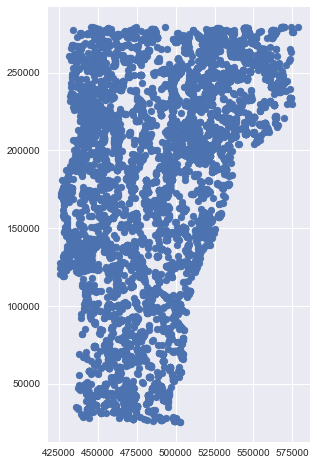

In [14]:
cenwat.plot()

In [15]:
cenwat.head(5)

,LocationID,Name,Latitude,Longitude,Descriptio,WBID,BioSiteID,RM,LakeID,BugAssessm,...,FAMILIES,AVE_FAM_SZ,HSE_UNITS,URBAN,RURAL,VACANT,OWNER_OCC,RENTER_OCC,SHAPESTAre,SHAPESTLen
0,502000,Mill Brook,44.45639,-73.01194,Located upstream of bridge on Tarbox Rd.,VT08-04,491300000006,0.6,None,0,...,35168,3.02,58864,0,0,2412,37292,19160,1.604814e+09,202393.239094
1,502001,Mill Brook,44.44472,-72.97639,Located immediately above 3rd bridge.,VT08-04,491300000027,2.7,None,NA,...,35168,3.02,58864,0,0,2412,37292,19160,1.604814e+09,202393.239094
2,502002,Mill Brook,44.44528,-72.97472,Located below 4th bridge.,VT08-04,491300000028,2.8,None,NA,...,35168,3.02,58864,0,0,2412,37292,19160,1.604814e+09,202393.239094
3,502003,Huntington River,44.30723,-72.98305,"Adjacent to Huntington-Huntington Center Road,...",VT08-10,492300000106,10.6,None,0,...,35168,3.02,58864,0,0,2412,37292,19160,1.604814e+09,202393.239094
4,502004,John Brook,44.34222,-72.96833,Located above bridge crossing Happy Hollow Rd.,VT08-10,492303000023,2.3,None,0,...,35168,3.02,58864,0,0,2412,37292,19160,1.604814e+09,202393.239094


In [16]:
cenwat.columns

Index(['LocationID', 'Name', 'Latitude', 'Longitude', 'Descriptio', 'WBID',
       'BioSiteID', 'RM', 'LakeID', 'BugAssessm', 'FishAssess', 'WQData',
       'HabitatDat', 'ReportURL', 'geometry', 'index_right', 'OBJECTID',
       'FIPSSTCO', 'STATE', 'COUNTY', 'OID_', 'STFID', 'POP2000', 'WHITE',
       'BLACK', 'AMERI_ES', 'ASIAN', 'HAWN_PI', 'OTHER', 'MULT_RACE',
       'HISPANIC', 'MALES', 'FEMALES', 'AGE_UNDER5', 'AGE_5_17', 'AGE_18_21',
       'AGE_22_29', 'AGE_30_39', 'AGE_40_49', 'AGE_50_64', 'AGE_65_UP',
       'MED_AGE', 'MED_AGE_M', 'MED_AGE_F', 'HOUSEHOLDS', 'AVE_HH_SZ',
       'HSEHLD_1_M', 'HSEHLD_1_F', 'MARHH_CHD', 'MARHH_NO_C', 'MHH_CHILD',
       'FHH_CHILD', 'FAMILIES', 'AVE_FAM_SZ', 'HSE_UNITS', 'URBAN', 'RURAL',
       'VACANT', 'OWNER_OCC', 'RENTER_OCC', 'SHAPESTAre', 'SHAPESTLen'],
      dtype='object')

Now all of the locations for water also contain population data for the county, something that might be useful for analysis of impact. 

## Attribute Merge

Sometimes you need to merge based on something other than geometry. In this case you need a common key between the two datasets. In the case of the census and the forest it is county.

In [17]:
forest.head()

,OBJECTID,CNTY,CNTYNAME,FLND1966,FLND1973,FLND1983,FLND1997,TLND1966,TLND1973,TLND1983,...,SWBF1999,SWBF2000,HPS1999,HPS2000,SPS1999,SPS2000,SAW2000,SHAPESTAre,SHAPESTLen,geometry
0,1,9,ESSEX,393.100006,397.299988,398.200012,405.500000,391.600006,396.100006,393.700012,...,11258,24364,4.7,2.4,8.2,18.9,5,1.742019e+09,273976.376341,"POLYGON ((547354.6873402984 278818.4055869313,..."
1,2,11,FRANKLIN,213.800003,238.100006,278.200012,290.899994,212.000000,236.899994,278.100006,...,7942,7063,6.3,6.1,5.8,5.5,4,1.792344e+09,186302.287654,"POLYGON ((445428.2172680789 279488.6855872976,..."
2,3,13,GRAND ISLE,213.800003,238.100006,278.200012,290.899994,212.000000,236.899994,278.100006,...,7942,7063,6.3,6.1,5.8,5.5,4,5.036918e+08,131216.935453,"POLYGON ((433753.55725986 272277.8355821182, 4..."
3,4,19,ORLEANS,323.399994,339.100006,310.000000,332.200012,322.600006,339.000000,305.100006,...,23425,19822,4.9,7.3,17.1,15.4,18,1.870489e+09,209742.900339,"POLYGON ((495785.6573037624 278662.0555869097,..."
4,5,15,LAMOILLE,250.100006,254.399994,239.000000,240.699997,248.300003,251.199997,235.500000,...,6494,6733,12.5,12.0,4.7,5.2,12,1.198783e+09,163591.156113,"POLYGON ((466352.3072830908 237070.7255575176,..."


In [18]:
census.head()

,OBJECTID,FIPSSTCO,STATE,COUNTY,OID_,STFID,POP2000,WHITE,BLACK,AMERI_ES,...,AVE_FAM_SZ,HSE_UNITS,URBAN,RURAL,VACANT,OWNER_OCC,RENTER_OCC,SHAPESTAre,SHAPESTLen,geometry
index_right,,,,,,,,,,,,,,,,,,,,,
0,1,50001,Vermont,Addison,0,50001,35974,34844,196,93,...,3.02,15312,0,0,2244,9782,3286,2.093455e+09,224144.316819,"POLYGON ((471110.1172867668 152350.9054984394,..."
1,2,50003,Vermont,Bennington,1,50003,36994,36161,155,74,...,2.91,19403,0,0,4557,10599,4247,1.755100e+09,215455.471387,"POLYGON ((436337.1072635216 37330.0554193073, ..."
2,3,50005,Vermont,Caledonia,2,50005,29702,28954,87,163,...,2.95,14504,0,0,2841,8499,3164,1.702881e+09,254119.336311,(POLYGON ((516165.9173180934 187054.0355226113...
3,4,50007,Vermont,Chittenden,3,50007,146571,139446,1328,403,...,3.02,58864,0,0,2412,37292,19160,1.604814e+09,202393.239094,"POLYGON ((453514.1172740302 241227.2455603733,..."
4,5,50009,Vermont,Essex,4,50009,6459,6237,11,41,...,2.92,4762,0,0,2160,2069,533,1.744999e+09,266955.505549,"POLYGON ((574943.5073595017 233740.7855550044,..."


What becomes obvious at first is that the names of the county column is different, so that has to be corrects first with a quick change to make them the same.

In [19]:
forest = forest.rename(columns={'CNTYNAME': 'COUNTY'})
forest.head(1)

,OBJECTID,CNTY,COUNTY,FLND1966,FLND1973,FLND1983,FLND1997,TLND1966,TLND1973,TLND1983,...,SWBF1999,SWBF2000,HPS1999,HPS2000,SPS1999,SPS2000,SAW2000,SHAPESTAre,SHAPESTLen,geometry
0,1,9,ESSEX,393.100006,397.299988,398.200012,405.5,391.600006,396.100006,393.700012,...,11258,24364,4.7,2.4,8.2,18.9,5,1.742019e+09,273976.376341,"POLYGON ((547354.6873402984 278818.4055869313,..."


The first time I ran the merge I got all the headers but no data, it took a second to realized capitlization was interfering with the merges. Make sure your matching data truly matches otherwise you may accidently leave things on the table.

In [20]:
county = census['COUNTY']
census['COUNTY'] = county.str.upper()
census.head(1)

,OBJECTID,FIPSSTCO,STATE,COUNTY,OID_,STFID,POP2000,WHITE,BLACK,AMERI_ES,...,AVE_FAM_SZ,HSE_UNITS,URBAN,RURAL,VACANT,OWNER_OCC,RENTER_OCC,SHAPESTAre,SHAPESTLen,geometry
index_right,,,,,,,,,,,,,,,,,,,,,
0,1,50001,Vermont,ADDISON,0,50001,35974,34844,196,93,...,3.02,15312,0,0,2244,9782,3286,2.093455e+09,224144.316819,"POLYGON ((471110.1172867668 152350.9054984394,..."


Since both files have geometry, merging them as is produces a pandas, not a geopandas dataframe. First you have to delete the geometry from one of the files. 

In [21]:
del forest['SHAPESTAre']
del forest['SHAPESTLen']
del forest['geometry']
forest.columns

Index(['OBJECTID', 'CNTY', 'COUNTY', 'FLND1966', 'FLND1973', 'FLND1983',
       'FLND1997', 'TLND1966', 'TLND1973', 'TLND1983',
       ...
       'CNAC1999', 'HWBF1999', 'HWBF2000', 'SWBF1999', 'SWBF2000', 'HPS1999',
       'HPS2000', 'SPS1999', 'SPS2000', 'SAW2000'],
      dtype='object', length=148)

In [22]:
cenforest = census.merge(forest, on='COUNTY')
type(cenforest)

geopandas.geodataframe.GeoDataFrame

In [23]:
cenforest.columns

Index(['OBJECTID_x', 'FIPSSTCO', 'STATE', 'COUNTY', 'OID_', 'STFID', 'POP2000',
       'WHITE', 'BLACK', 'AMERI_ES',
       ...
       'CNAC1999', 'HWBF1999', 'HWBF2000', 'SWBF1999', 'SWBF2000', 'HPS1999',
       'HPS2000', 'SPS1999', 'SPS2000', 'SAW2000'],
      dtype='object', length=194)

The data is now merged! There are ways to specify the join types and the like, but for now this is a good way to start.

## Creating New Shapefile

After doing all that work I want to export the updated data as a new shapefile. It is a simple command and then the file is ready to be consumed. In this case I then exported it back into QGIS for visualization.

In [24]:
# Determine the output path for the Shapefile
out = r"cenforest.shp"

# Write the data into that Shapefile
cenforest.to_file(out)

## Summary

Like most things in data analysis, the time consuming part is getting data into a form that answers the question you are asking